Two-layer ocean climate model
========

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import climate_model
import importlib
importlib.reload(climate_model)
model = climate_model.ClimateModel()
ui = climate_model.ClimateModelUI(model)
ui.display()

Output()

In [2]:
rmse, opt_lam = model.optimize_lambda()
print(f'Optimal lambda is {opt_lam:.3f}, which gives an RMSE of {rmse:.6f}')

Optimal lambda is 1.140, which gives an RMSE of 0.130815


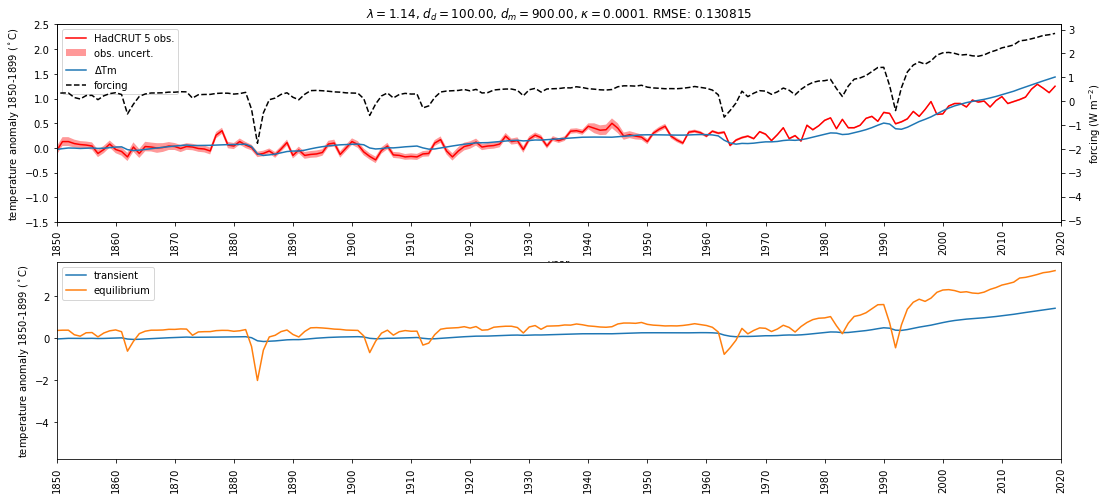

In [3]:
model.run_model(lam=opt_lam)
model.plot()

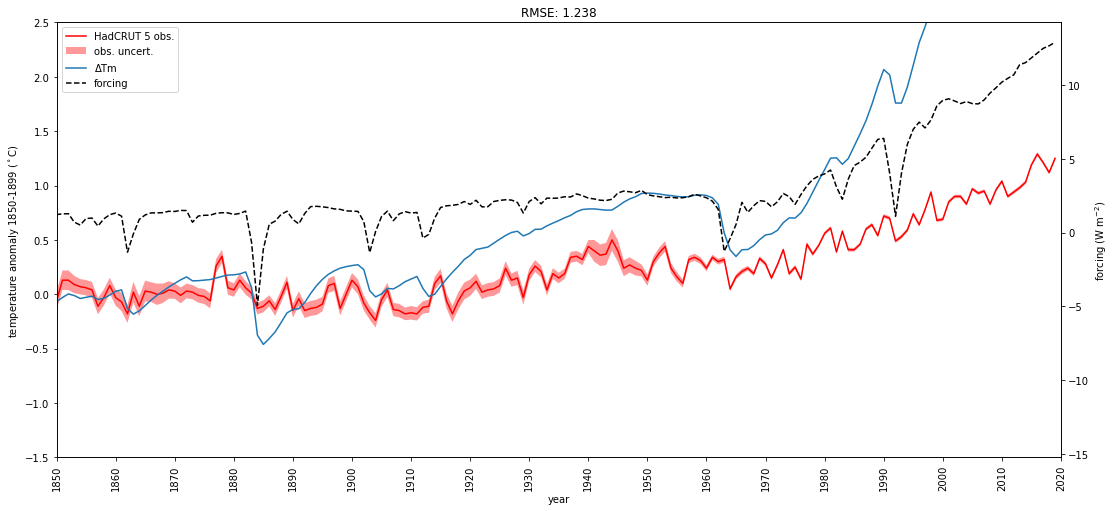

In [4]:
method = '3xCO2'

if method == 'step':
    # Turn on forcing at 1900:
    total_forcing = np.zeros_like(model.forcings.year.loc[1:])
    total_forcing[150:] = 1
elif method == 'pulse':
    # Forcing pulse 1900-1909:
    total_forcing = np.zeros_like(model.forcings.year.loc[1:])
    total_forcing[150:160] = 3
elif method == '3xCO2':
    # 3x CO2 forcing:
    columns = [c for c in model.forcings.columns if c != 'year']
    forcings = model.forcings.copy()
    forcings['co2'] *= 3
    total_forcing = forcings.loc[1:][columns].sum(axis=1)
else:
    raise Exception(f'Unknown method: {method}')

model.run_model(total_forcing=total_forcing)
model.plot(show_equilibrium=False)

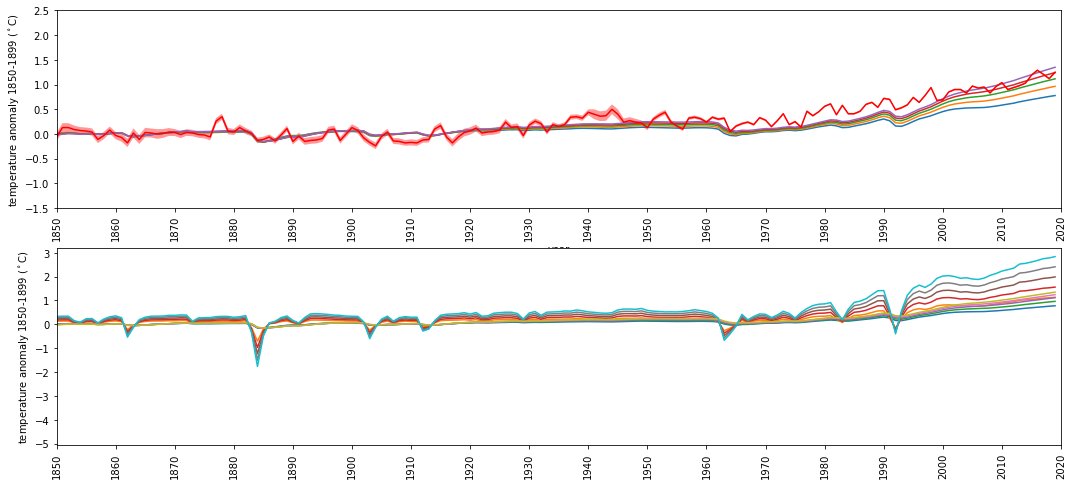

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches((18, 8))
for lam in np.linspace(0.4, 1, 5):
    model.run_model(lam=lam)
    model.plot(ax1=ax1, ax2=ax2, show_forcing=False)
model.base_plot(ax=ax1)

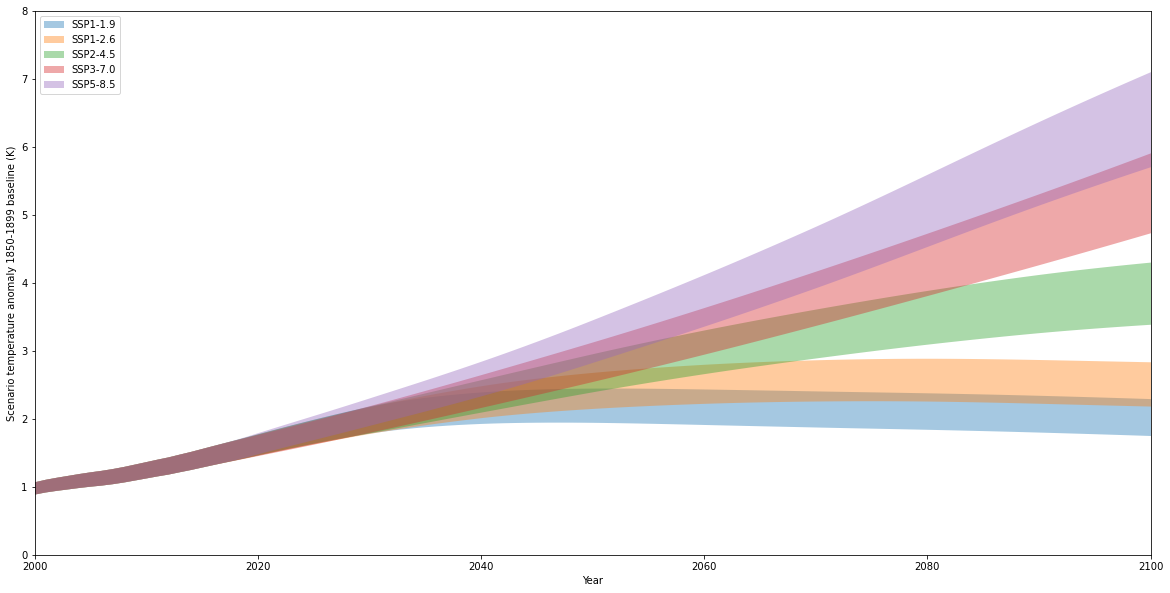

In [6]:
lam_uncert = 0.2
lam_min = opt_lam - opt_lam * lam_uncert
lam_max = opt_lam + opt_lam * lam_uncert

plt.figure(figsize=(20, 10))
for scenario in model.scenarios:
    model.run_model(future_scenario=scenario, lam=lam_min)
    dTm_min = model.dT.dTm.values.copy()
    model.run_model(future_scenario=scenario, lam=lam_max)
    dTm_max = model.dT.dTm.values.copy()
    
    plt.fill_between(
        model.dT.year.values,
        dTm_min,
        dTm_max,
        alpha=0.4, 
        label=f'{scenario}'
    )
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Scenario temperature anomaly 1850-1899 baseline (K)')
plt.xlim((2000, 2100))
plt.ylim((0, 8));